# Predicting COVID-19 Hospitalizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import filterpy
from pandas import DataFrame
from filterpy.kalman import KalmanFilter

In [2]:
# Simulation Results
cols = ['A_Dead','C_Dead','S_Dead','Total_Dead','A_Exp','C_Exp','S_Exp','Total_Exp','Total_Daily_Tests','Total_Daily_Hos']
RTEM_df = pd.read_csv('SimulationResults.csv',names = cols)
RTEM_df
# Daily_Hos = RTEM_df['Total_Daily_Hos']
# Time = range(0,365)
# plt.plot(Time,Daily_Hos)

,A_Dead,C_Dead,S_Dead,Total_Dead,A_Exp,C_Exp,S_Exp,Total_Exp,Total_Daily_Tests,Total_Daily_Hos
0,0.000000,0.000000e+00,0.000000e+00,1369800.0,0.000000,0.000000,0.000000,3727700.0,0.000000,NaN
1,0.000319,3.300000e-10,7.483600e-08,1369800.0,0.020583,0.012147,0.003374,3727700.0,0.074869,NaN
2,0.000578,6.828900e-09,1.547400e-06,1369800.0,0.040423,0.023856,0.006627,3727700.0,0.112470,NaN
3,0.000796,3.474600e-08,7.867400e-06,1369800.0,0.049439,0.029177,0.008105,3727700.0,0.127580,NaN
4,0.000987,1.013600e-07,2.293700e-05,1369800.0,0.052832,0.031180,0.008661,3727700.0,0.130030,NaN
...,...,...,...,...,...,...,...,...,...,...
360,5008.200000,4.511400e+01,1.570100e+04,1369800.0,8540.700000,4607.000000,1445.800000,3727700.0,17104.000000,NaN
361,5039.300000,4.532300e+01,1.581200e+04,1369800.0,8505.200000,4591.300000,1438.900000,3727700.0,16975.000000,NaN
362,5070.200000,4.553100e+01,1.592300e+04,1369800.0,8471.400000,4576.500000,1432.300000,3727700.0,16852.000000,NaN
363,5101.000000,4.573700e+01,1.603400e+04,1369800.0,8445.300000,4565.900000,1427.100000,3727700.0,16735.000000,NaN


In [3]:
RTEM_df

,A_Dead,C_Dead,S_Dead,Total_Dead,A_Exp,C_Exp,S_Exp,Total_Exp,Total_Daily_Tests,Total_Daily_Hos
0,0.000000,0.000000e+00,0.000000e+00,1369800.0,0.000000,0.000000,0.000000,3727700.0,0.000000,NaN
1,0.000319,3.300000e-10,7.483600e-08,1369800.0,0.020583,0.012147,0.003374,3727700.0,0.074869,NaN
2,0.000578,6.828900e-09,1.547400e-06,1369800.0,0.040423,0.023856,0.006627,3727700.0,0.112470,NaN
3,0.000796,3.474600e-08,7.867400e-06,1369800.0,0.049439,0.029177,0.008105,3727700.0,0.127580,NaN
4,0.000987,1.013600e-07,2.293700e-05,1369800.0,0.052832,0.031180,0.008661,3727700.0,0.130030,NaN
...,...,...,...,...,...,...,...,...,...,...
360,5008.200000,4.511400e+01,1.570100e+04,1369800.0,8540.700000,4607.000000,1445.800000,3727700.0,17104.000000,NaN
361,5039.300000,4.532300e+01,1.581200e+04,1369800.0,8505.200000,4591.300000,1438.900000,3727700.0,16975.000000,NaN
362,5070.200000,4.553100e+01,1.592300e+04,1369800.0,8471.400000,4576.500000,1432.300000,3727700.0,16852.000000,NaN
363,5101.000000,4.573700e+01,1.603400e+04,1369800.0,8445.300000,4565.900000,1427.100000,3727700.0,16735.000000,NaN


In [4]:
AZ_df = pd.read_csv('arizona-history.csv')
# No Hos Data
CA_df = pd.read_csv('california-history.csv')
CO_df = pd.read_csv('colorado-history.csv')
#No Hos Data
FL_df = pd.read_csv('florida-history.csv')
# No Hos Data
IL_df = pd.read_csv('illinois-history.csv')
NM_df = pd.read_csv('new-mexico-history.csv')
# No Hos Data
NY_df = pd.read_csv('new-york-history.csv')
# No Hos Data
TX_df = pd.read_csv('texas-history.csv')
VA_df = pd.read_csv('virginia-history.csv')
WA_df = pd.read_csv('washington-history.csv')



In [5]:
def dt_function(df):
    
    df['date'] = pd.to_datetime(df['date'])
    col_list = ['date', 'hospitalizedIncrease']
    df = df[col_list]
    df['hospitalizedIncrease'] = np.abs(df['hospitalizedIncrease'])
    df = df.sort_values('date')
    return df

In [6]:
AZ_df= dt_function(AZ_df)
CA_df = dt_function(CA_df)
CO_df=dt_function(CO_df)
FL_df=dt_function(FL_df)
IL_df=dt_function(IL_df)
NM_df=dt_function(NM_df)
NY_df=dt_function(NY_df)
TX_df=dt_function(TX_df)
VA_df=dt_function(VA_df)
WA_df=dt_function(WA_df)

<ipython-input-5-d53a58811178>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hospitalizedIncrease'] = np.abs(df['hospitalizedIncrease'])


In [7]:
# clist = []
# def cleaning_f(Series):    
#     for element in Series:
#         if element > 0:
#             clist.append(element)
#         else:
#             abs_element = np.abs(element)
#             clist.append(abs_element)
#     return pd.Series(clist)


In [10]:
def plot_f(df):    
    dates = df['date']
    daily_hos = df['hospitalizedIncrease']

    plt.plot(dates, daily_hos)
    plt.xlabel('Time')
    plt.ylabel('Daily Hospitalizations')

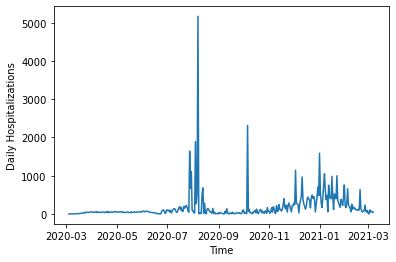

In [11]:
plot_f(AZ_df)

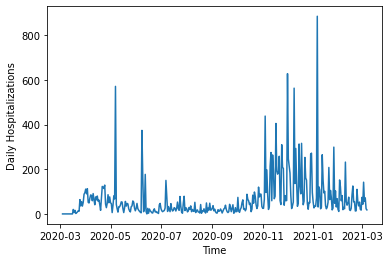

In [12]:
plot_f(CO_df)

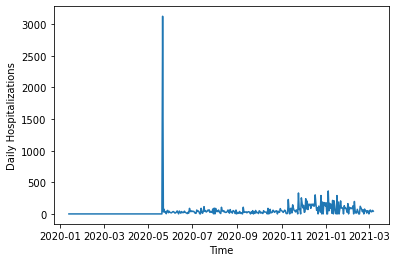

In [13]:
plot_f(WA_df)

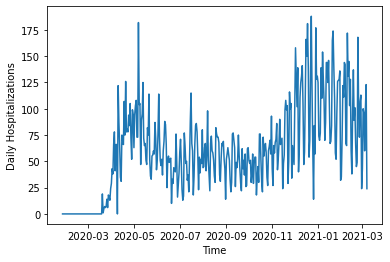

In [14]:
plot_f(VA_df)

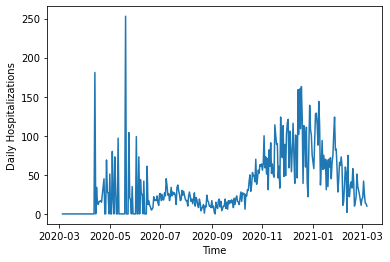

In [15]:
plot_f(NM_df)

# ARIMA Forecasting
    
    p = number of lag observations included in the model (lag order)
    d = number of times that the raw observations are differences (degree of differencing)
    q = size of moving average window (order of moving average)

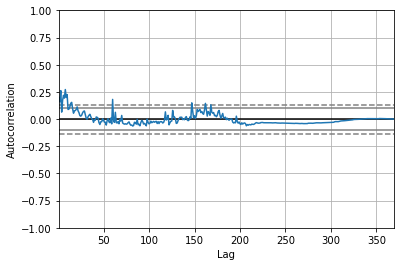

In [16]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

autocorrelation_plot(AZ_df['hospitalizedIncrease'])
pyplot.show()

In [17]:
model = ARIMA(AZ_df['hospitalizedIncrease'], order = (50 , 1,0))
model_fit = model.fit()

print(model_fit.summary())

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                                SARIMAX Results                                 
Dep. Variable:     hospitalizedIncrease   No. Observations:                  369
Model:                  ARIMA(50, 1, 0)   Log Likelihood               -2657.898
Date:                  Tue, 30 Mar 2021   AIC                           5417.796
Time:                          13:31:35   BIC                           5617.108
Sample:                               0   HQIC                          5496.981
                                  - 369                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8996      0.062    -14.611      0.000      -1.020      -0.779
ar.L2         -0.8644      0.076    -11.395      0.000      -1.013      -0.716
ar.L3         -0.6477      0.088    

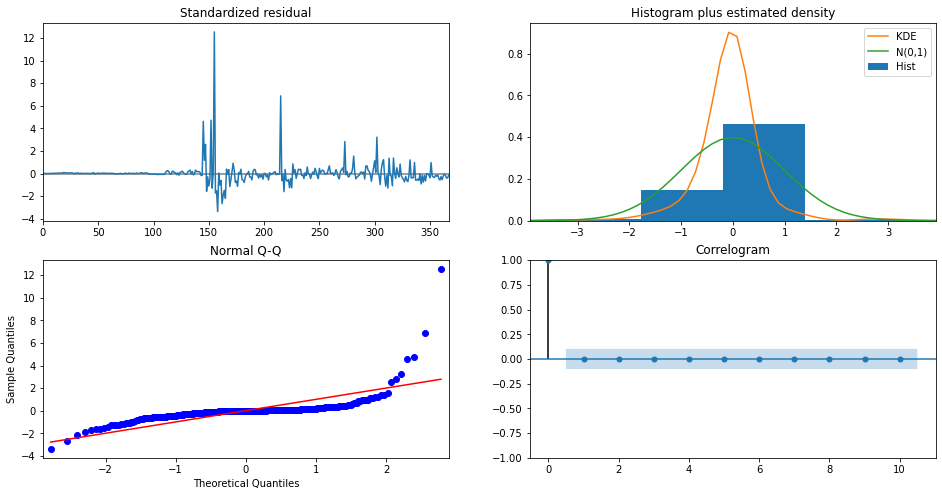

In [21]:
model_fit.plot_diagnostics(figsize = (16,8))
plt.show()

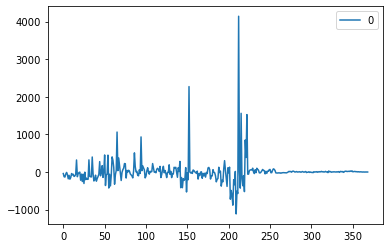

In [18]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

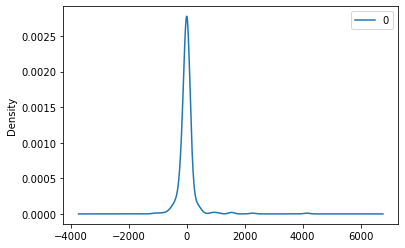

In [19]:
# Density plot of residuals
residuals.plot(kind = 'kde')
pyplot.show()

In [20]:
print(residuals.describe())

                 0
count   369.000000
mean      2.813277
std     330.287435
min   -1113.878275
25%     -58.330498
50%      -0.657829
75%      21.805437
max    4141.560004


# A non-zero mean in the residuals means that there is a bias in the prediction